<a href="https://colab.research.google.com/github/Gridnn/Sales-prediction/blob/main/TradingStrategy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Trading Coursework


In [6]:
#Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import math
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy.random import default_rng
from numpy.random import seed

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
# 1.Initialise the random number generator of your chosen programming package using a seed equal 
#   to your student number.

# Paramethers' Input
seed(20057398)                   # seeding
rng= default_rng
wn = np.random.normal(0,1, 2000) # generating the white noise
y0 = 100
y1 = 100
t  = np.arange(2000)
T  = 2000
phi= 0.6
d  = 0.025
theta = -0.4

the array of d_y is  [ 0.         -1.21515776 -0.89112638 ... -1.53067908  0.75777432
  0.        ] 



Text(0, 0.5, '$\\Delta y_{t}$')

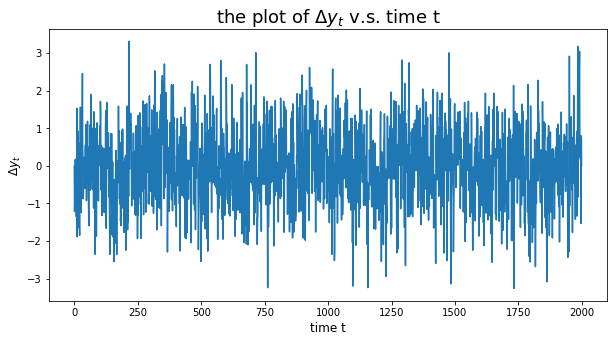

In [14]:
# d_y generating
d_y = np.zeros(2000)                
d_y[0] = y1 - y0
for t in range(1,1999):
    d_y[t] = phi* (d_y[t-1] - d) + wn[t] + theta * wn[t-1] +d
print('the array of d_y is ', d_y, "\n")
# plot of d_y
plt.figure(figsize = [10,5])
plt.plot(d_y)
plt.title('the plot of $\Delta y_{t}$ v.s. time t', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('$\Delta y_{t}$', size = 12)

Text(0, 0.5, '$y_{t}$')

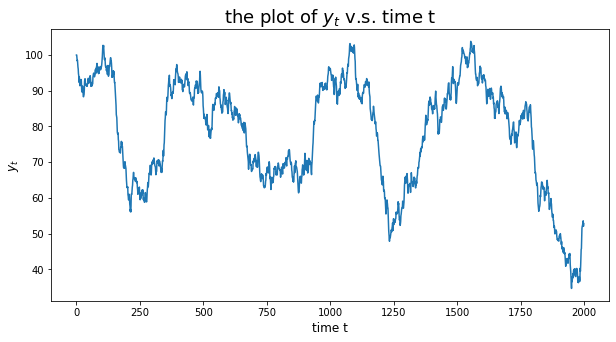

In [15]:
# Putting d_y back into y
y = np.zeros(2000)
y[0:2] = 100
for t in range(2,1999):
    y[t] = y[t-1] + d_y[t]

# plot of y
plt.figure(figsize = [10,5])
plt.plot(y[:-1])
plt.title('the plot of $y_{t}$ v.s. time t', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('$y_{t}$', size = 12)


In [17]:
# Data Splitting
S_p = math.floor(T * 0.7) #Splitting point
train = d_y[0:S_p]
test  = d_y[S_p: T]
train_y = y[0:S_p]
test_y  = y[S_p: T]
t = range(2000)
# Observing the y with splitting of train and test data




Text(0, 0.5, '$y_{t}$')

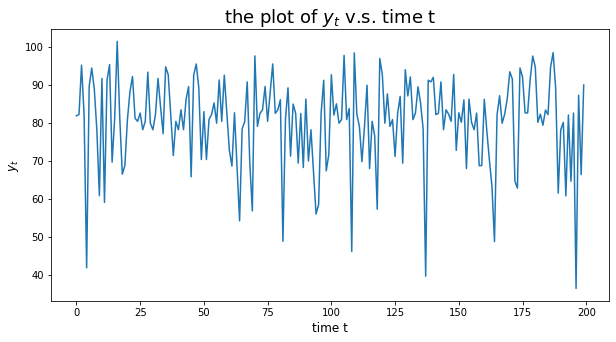

In [ ]:
predict
# plot of y
plt.figure(figsize = [10,5])
plt.plot(predict)
plt.title('the plot of $y_{t}$ v.s. time t', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('$y_{t}$', size = 12)

In [ ]:
np.shape(predict)

(600,)

(array([0.06084089, 0.        , 0.12168177, 0.        , 0.        ,
        0.        , 0.        , 0.06084089, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06084089,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06084089, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06084089, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06084089, 0.        , 0.        , 0.06

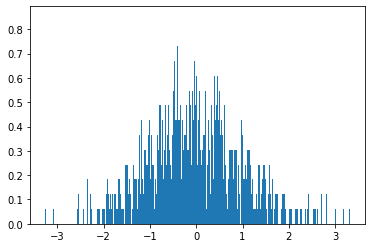

In [ ]:
# histogram
plt.hist(d_y, bins=800,density= True)

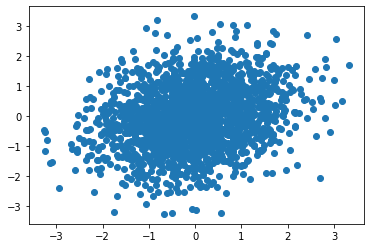

In [ ]:
# lag plot 
plt.plot(d_y[1:],d_y[:-1],'o')

## Trading Strategies
1.Define 3 self-financing long-only trading strategies with initial cash C0 = 10000. The
self-financing condition for the update of cash and volume at each time step is given by <br>
TV(t) = C(t) + p(t)V(t) = C(t +1) + p(t)V(t +1), <br>
for all time steps t. The long-only condition is given by V(t) ≥ 0 for all time steps. No
borrowing is also considered, C(t) ≥ 0 for all time steps. If your strategy has coefficients,
only use the training set to choose them.<br> <br>
2.Define the return of a trading strategy a at time t as,<br>
$r_a(t) = log ( \frac{TV_a (t) }{ TV_a (t-1)})$

### STRATEGY MAKING

In [ ]:
# Strategy 1:  (TREND Following)
def STRATEGY_gen(ts, b_s, s_s,p_b=1,p_s=1):
    # Input: ts: time series, b_s: buy-in strategy, s_s: sell-out strategy, p_b(s): proportion of cash for buying (selling)
        # Output: TV: vector of Total Value in time series B: buying time C: Selling time
    cash = np.zeros(len(ts))
    cash[0] = 10000
    w = np.zeros(len(ts))
    w[0] = 0
    B = np.zeros(len(ts))
    S = np.zeros(len(ts))
    
    
    for t in range(1,len(ts)):
        b=0
        s=0
    # Condition for longing (No leverages)
        if cash[t-1]>0:
            b = b_s(ts[:t])
            if b == 1:
                V = math.floor((cash[t-1]*p_b)/ ts[t])     # the amount of shares bought at time t.
                w[t] = w[t-1] + V
                cash[t] = cash[t-1]- V *ts[t]            # cash changes
                B[t] = np.sum(cash[t]!=cash[t-1])        # mark time t as buying time
           
    # Condition for selling: (No borrowing)
        if w[t-1] >0 :
            s = s_s(ts[:t])
            if s == 1:
                V = w[t-1] * p_s                            # the amount of shares sold
                w[t] = w[t-1] -V
                cash[t] = cash[t-1] + V * ts[t]
                S[t] = np.sum(cash[t]!=cash[t-1])
    
    #if no buying and selling required:
        if b + s ==0:
        #No operations
            w[t]=w[t-1]
            cash[t]=cash[t-1]
        
        TV = [a*b for a,b in zip(w,ts)] + cash

    return TV, B, S, cash



# Buying Strategy 1
def TF_b_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    
    time_window = 27              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of buying 
    if ts[-1] > MA:
        return 1
    else: 
        return 0
    
# Selling Strategy 1
def TF_s_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= sell now, 0= hold on
    time_window = 27              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of selling 
    if ts[-1] < MA:
        return 1
    else: 
        return 0
    

In [ ]:
# Buying and selling 2
# Buy and sell depending on the signal generated from mA5 and MA27

# Buying Strategy 2
def TF_b_s2(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    # Buying if the 5 MA(1) breaches the 27 MA (2)
    
    time_window2 = 27              # time window requirement
    time_window1 =  5
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 > MA2:
        return 1
    else: 
        return 0
    
def TF_s_s2(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    # Buying if the 5 MA(1) breaches the 27 MA (2)
    
    time_window2 = 27              # time window requirement
    time_window1 =  5
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 < MA2:
        return 1
    else: 
        return 0

In [ ]:
# TF strategies 3
 #

In [ ]:
# (Mean Reverting)

# Buying Strategy 3
def MR_b_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    
    time_window = 27              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of buying 
    if ts[-1] > MA:
        return 0
    else: 
        return 1
    

    
# Selling Strategy 3
def MR_s_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= sell now, 0= hold on
    time_window = 27              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of selling 
    if ts[-1] < MA:
        return 0
    else: 
        return 1

### Result Discussion - strategy

In [ ]:
TF1 , B1, S1, cash1= STRATEGY_gen(train_y, TF_b_s1, TF_s_s1,1,1)
TF2 , B2, S2, cash2= STRATEGY_gen(train_y, TF_b_s2, TF_s_s2,0.15,0.15)
MR1 , B_MR, S_MR, cash_MR1= STRATEGY_gen(train_y, MR_b_s1, MR_s_s1,0.15,0.15)

In [ ]:
TF1

array([10000.        , 10000.        , 10000.        , ...,
       13859.4826624 , 13783.52438368, 13611.31166261])

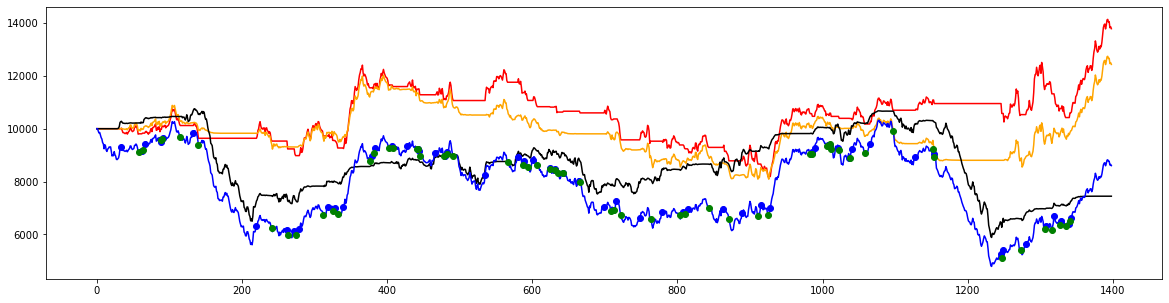

In [ ]:
# Trending Strategy

plt.figure(figsize = [20,5])
plt.plot(TF1[:-1], color = 'red')
plt.plot(TF2[:-1], color= 'orange')
plt.plot(MR1[:-1], color= 'black')
plt.plot(100*train_y[:-1], color = 'blue')
B_date = np.where(B == 1)[0]
S_date = np.where(S == 1)[0]
plt.plot(B_date,100*train_y[B_date],'o', color='blue')
plt.plot(S_date,100*train_y[S_date],'o', color='green')


## Performance Indicators
Compute 3 representative performance indicators, Sharpe ratio and two alternatives introduced during lectures, to evaluate the trading strategies. If appropriate, for each of them 
provide two independent measures: within the training set and within the test set. <br> <br>
For the hypotheses that the strategies have a non-zero Sharpe ratio, use a statistical test
covered in the lectures to control for Family Wise Error Rate (FWER) at a confidence
level of 5%. Explain why this is a useful thing to do; you can use a simple example to
illustrate you answer.

# Mean Reverting Trading Strategy


Text(0, 0.5, 'Total Value')

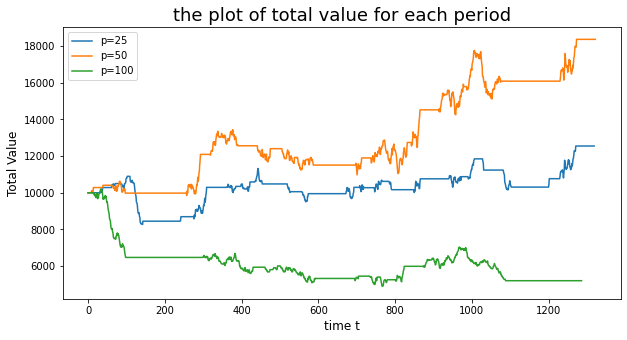

In [169]:
# Compute MA27
MA27 = np.zeros_like(train_y)
for t in range(27, len(train_y)):
  MA27[t] = np.mean(train_y[t-27:t])

# Define the mean reverting function
def MR_Stra(trend, MA, D1, D2, Ts, ini_cash):
  price = 0
  cash = np.zeros_like(MA)
  w = np.zeros_like(MA)
  TV = []
  cash[0] = ini_cash
  for i in range(1,len(MA)):
    # buy
    if trend[i] <=  D1*MA[i] and cash[i-1] != 0:
      w[i] = cash[i-1]/trend[i] 
      cash[i] = 0
      price = trend[i]
    # sell
    elif trend[i] >= D2*MA[i] and w[i-1] != 0:
      cash[i] = w[i-1]*trend[i] 
      w[i] = 0

    elif trend[i] < Ts*price and w[i-1] != 0:
      cash[i] = w[i-1]*trend[i] 
      w[i] = 0

    # keep money
    else: 
      cash[i] = cash[i-1]
      w[i] = w[i-1]

    TV.append(cash[i] + w[i]*trend[i])
  return TV

# Find the optimal parameter for mean reverting function
def best_parameter(trend, MA, ini_cash):
  # Find optimal D and Ts
  best_profit = -10000
  best_D1 = 0
  best_D2 = 0
  for D1 in np.linspace(0,1,11):
    for D2 in np.linspace(1,2,11):
      for Ts in np.linspace(0,1,11):
          profit = MR_Stra(trend, MA, D1, D2, Ts, ini_cash)
          if profit[-1] > best_profit:
            best_profit = profit[-1]
            best_D1 = D1
            best_D2 = D2
            best_Ts = Ts
  return best_D1,best_D2,best_Ts,best_profit

# Calculate the trend of total value by mean reverting method 
# depending on different period 
def period(p,t,trend_p,MA_p):
  iter = int(t/p)
  trend = np.zeros([iter,p])
  MA = np.zeros([iter,p])
  profit = 0
  TV = []
  ini_cash = 10000
  for i in range(iter):
    trend[i] = trend_p[(i)*p:(i+1)*p]
    MA[i] = MA_p[(i)*p:(i+1)*p]
  for j in range(1,len(trend)):
    D1,D2,Ts,profit_pre = best_parameter(trend[j-1],MA[j-1],ini_cash)
    TV += MR_Stra(trend[j], MA[j], D1, D2, Ts, ini_cash)
    ini_cash = TV[-1]
  return TV

# get the total value vector for each period
TV25 = period(25,1400,train_y,MA27)
TV50 = period(50,1400,train_y,MA27)
TV100 = period(100,1400,train_y,MA27)

# plot
plt.figure(figsize = [10,5])
plt.plot(TV25)
plt.plot(TV50)
plt.plot(TV100)
plt.legend(['p=25','p=50','p=100'])
plt.title('the plot of total value for each period', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('Total Value', size = 12)